In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math as Math
from google.colab.patches import cv2_imshow # cv2_imshow
from IPython.display import HTML
from base64 import b64encode

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
pathOrigin = '/content/drive/My Drive/processamento-de-video/R3/'

In [ ]:
def openImageCv(fileName, param = "NULL"):
  # Caminho completo da imagem
  pathImage = pathOrigin + fileName
  # Função 'imread' da biblioteca 'cv' para realizar a leitura da imagem à partir de seu arquivo

  if param == "NULL":
    return cv.imread(pathImage)

  return cv.imread(pathImage, param)


def showImg(img):
  cv2_imshow(img)
  # ele printa em BGR
  # plt.imshow(img)
  # plt.show()



In [ ]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 'COLOR_BGR2HSV', 'COLOR_

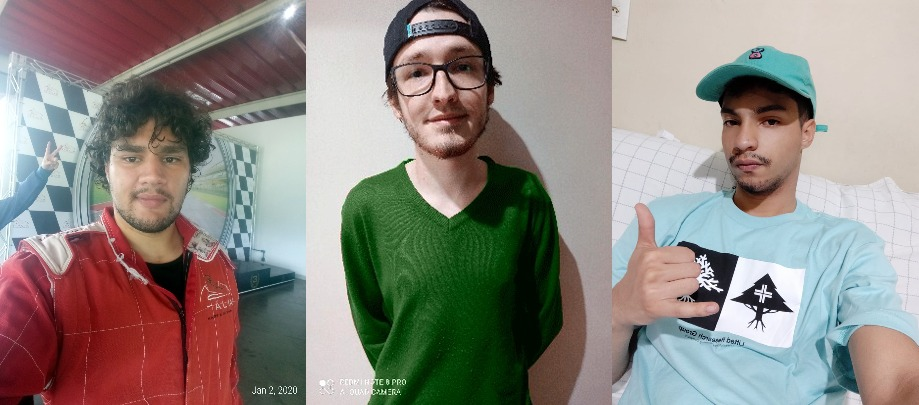

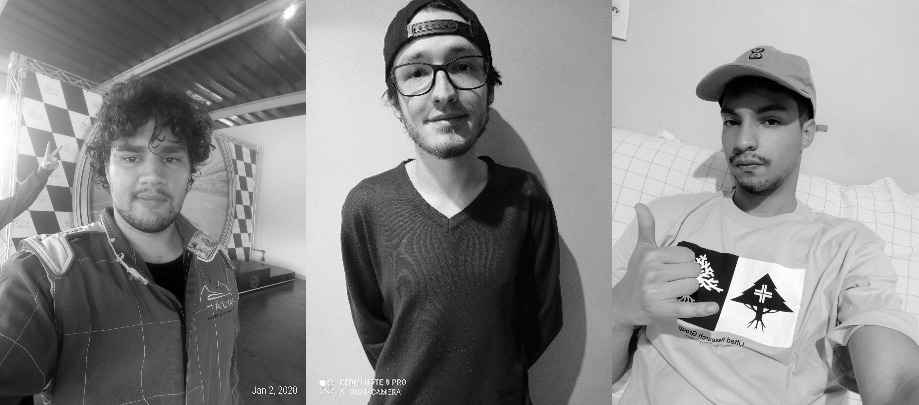

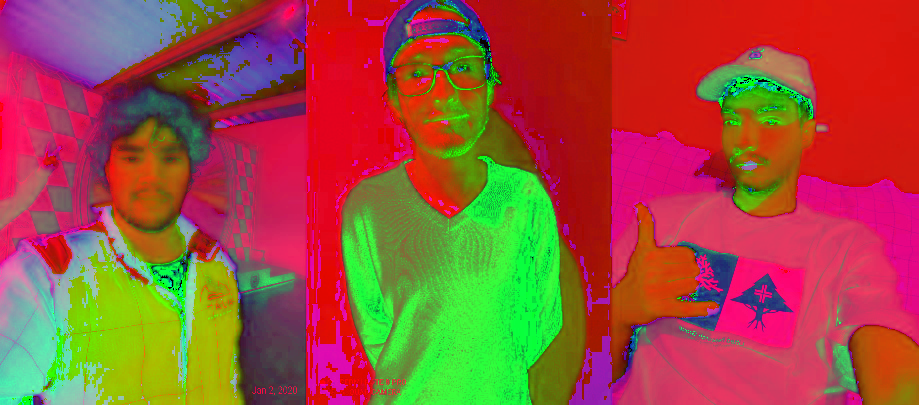

In [ ]:
fileName = 'grupo-rgb.jpg'

image = openImageCv(fileName)

showImg(image)

image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
showImg(image_gray)

image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
showImg(image_hsv)

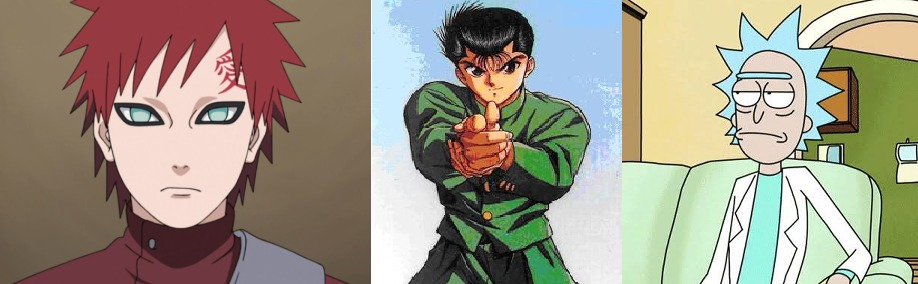

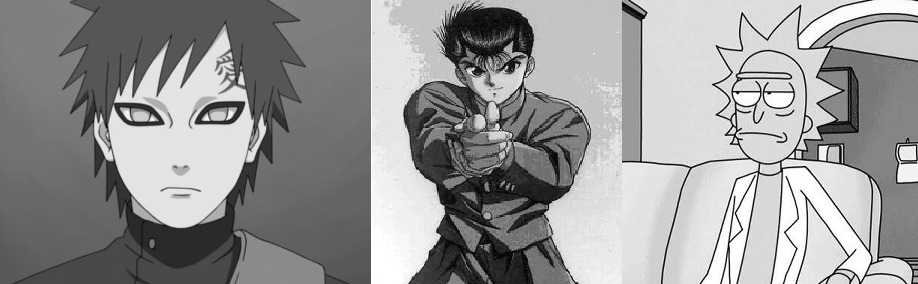

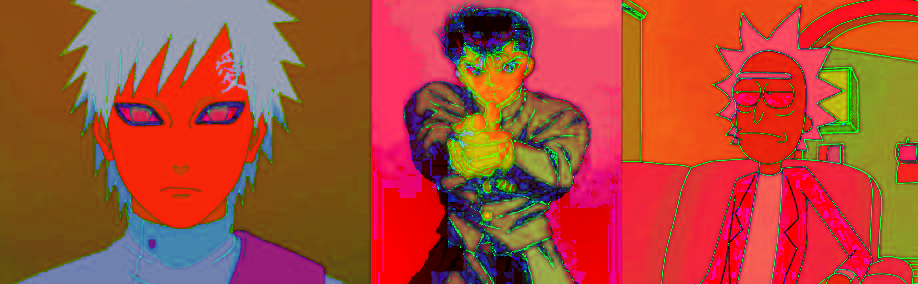

In [ ]:
fileName = 'grupo-avatar-rgb.jpg'

image = openImageCv(fileName)

showImg(image)

image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
showImg(image_gray)

image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
showImg(image_hsv)

In [46]:
def getSize(video):
  while True:
    ret, frame = video.read()
    sizeFrameX , sizeFrameY, colors = frame.shape
    return (sizeFrameY, sizeFrameX)
    break

In [56]:
def blueObjectTracking (pathInput, pathOutput, fps):
  input = cv.VideoCapture(pathInput)
  
  size = getSize(input)

  fourcc = cv.VideoWriter_fourcc(*'VP80')
  output = cv.VideoWriter(pathOutput , cv.CAP_FFMPEG, fourcc, fps, size)

  while(input.isOpened()):
    # Take each frame
    ret, frame = input.read()

    if ret==True:
      # frame = cv.resize(frame, size)

      # Convert BGR to HSV
      hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
      # define range of blue color in HSV
      lower_blue = np.array([80,50,50])
      upper_blue = np.array([120,255,255])
      # Threshold the HSV image to get only blue colors
      mask = cv.inRange(hsv, lower_blue, upper_blue)
      # Bitwise-AND mask and original image
      res = cv.bitwise_and(frame,frame, mask= mask)
      output.write(res)
      k = cv.waitKey(5) & 0xFF
      if k == 27:
          break
    else:
      break

  input.release()
  output.release()

In [57]:
inputPath = pathOrigin + 'video_R3.mp4'

outputPath = pathOrigin + 'tracking_blue.webm'

blueObjectTracking(inputPath, outputPath, 30)

In [ ]:
inputVideo = open(inputPath,'rb').read()

inputVideoDecoded = "data:video/mp4;base64," + b64encode(inputVideo).decode()

HTML(f'<video width={320} height={240} controls><source src= {inputVideoDecoded} type="video/mp4">')

Output hidden; open in https://colab.research.google.com to view.

In [58]:
objectTracking = open(outputPath,'rb').read()

objectTrackingDecoded = "data:video/mp4;base64," + b64encode(objectTracking).decode()

HTML(f'<video width={320} height={240} controls><source src= {objectTrackingDecoded} type="video/webm">')

Output hidden; open in https://colab.research.google.com to view.

In [48]:
def blueAndRedTracking (pathInput, pathOutput, fps):
  video = cv.VideoCapture(pathInput)
  
  size = getSize(video)

  fourcc = cv.VideoWriter_fourcc(*'VP80')
  output = cv.VideoWriter(pathOutput , cv.CAP_FFMPEG, fourcc, fps, size)

  while(video.isOpened()):

    ret, frame = video.read()

    if ret==True:
      frame = cv.resize(frame, size)

      # Convert BGR to HSV
      hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
      # define range of blue color in HSV
      lower_blue = np.array([80,50,50])
      upper_blue = np.array([120,255,255])

      # define range of red color in HSV
      lower_red = np.array([150,30,30])
      upper_red = np.array([180,255,255])

      # Threshold the HSV image to get only blue colors
      mask_blue = cv.inRange(hsv, lower_blue, upper_blue)

      # Threshold the HSV image to get only red colors
      mask_red = cv.inRange(hsv, lower_red, upper_red)

      # compose mask with mask_red or mask_blue
      mask_blueOrRed = cv.bitwise_or(mask_blue, mask_red)

      # Bitwise-AND mask and original image
      res = cv.bitwise_and(frame,frame, mask= mask_blueOrRed)

      output.write(res)
      k = cv.waitKey(5) & 0xFF
      if k == 27:
          break
    else:
      break

  video.release()
  output.release()
  


In [49]:
inputPath = pathOrigin + 'video_R3.mp4'

outputPathBlueOrRed = pathOrigin + 'video_R3_Tracking_blue_or_red.webm'

blueAndRedTracking(inputPath, outputPathBlueOrRed, 30)


In [50]:
inputPath = pathOrigin + 'video_R3.mp4'

inputVideo = open(inputPath,'rb').read()

inputVideoDecoded = "data:video/mp4;base64," + b64encode(inputVideo).decode()

HTML(f'<video width={320} height={240} controls><source src= {inputVideoDecoded} type="video/mp4">')

Output hidden; open in https://colab.research.google.com to view.

In [51]:
objectTracking = open(outputPathBlueOrRed,'rb').read()

objectTrackingDecoded = "data:video/mp4;base64," + b64encode(objectTracking).decode()

HTML(f'<video width={320} height={240} controls><source src= {objectTrackingDecoded} type="video/webm">')

Output hidden; open in https://colab.research.google.com to view.